# Data visualization

## plotly.js

conda install plotly

Référence : https://plot.ly/python/

In [1]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np

print(__version__)

1.12.9


In [2]:
init_notebook_mode(connected=True)

#### Basic line chart

In [3]:
from plotly.graph_objs import *

trace0 = Scatter(
  x=[1, 2, 3, 4],
  y=[10, 15, 13, 17]
)
trace1 = Scatter(
  x=[1, 2, 3, 4],
  y=[16, 5, 11, 9]
)
data = Data([trace0, trace1])

iplot(data, filename = 'basic-line')

#### mutlicolor boxplot !

In [4]:
iplot([Box(y = np.random.randn(50), showlegend=False) for i in range(45)], show_link=False)

#### heat map

In [5]:
x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)

#### multiple lines

In [15]:
import pandas as pd
df = pd.read_csv('https://plot.ly/~etpinard/191.csv')
print(df.columns)
iplot({
    'data': [
        Scatter(x=df[continent+', y'],
                y=df[continent+', x'],
                text=df[continent+', text'],
                marker=Marker(size=df[continent+', size'], sizemode='area', sizeref=131868,),
                mode='markers',
                name=continent) for continent in ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
    ],
    'layout': Layout(xaxis=XAxis(title='Life Expectancy'), yaxis=YAxis(title='GDP per Capita', type='log'))
}, show_link=False)

Index(['Africa, x', 'Africa, y', 'Africa, text', 'Africa, size', 'Americas, x',
       'Americas, y', 'Americas, text', 'Americas, size', 'Asia, x', 'Asia, y',
       'Asia, text', 'Asia, size', 'Europe, x', 'Europe, y', 'Europe, text',
       'Europe, size', 'Oceania, x', 'Oceania, y', 'Oceania, text',
       'Oceania, size'],
      dtype='object')


#### multi lines

In [8]:
import cufflinks as cf
iplot(cf.datagen.lines().iplot(asFigure=True,
                               kind='scatter',xTitle='Dates',yTitle='Returns',title='Returns'))

#### complex maps

In [9]:
import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['long'],
        lat = df_airports['lat'],
        hoverinfo = 'text',
        text = df_airports['airport'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]
        
flight_paths = []
for i in range( len( df_flight_paths ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i] ],
            lat = [ df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i])/float(df_flight_paths['cnt'].max()),
        )
    )
    
layout = dict(
        title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False, 
        height = 800,
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
    
fig = dict( data=flight_paths + airports, layout=layout )

iplot(fig)


## d3.js

Example of a cool dashboard : http://adilmoujahid.com/posts/2015/01/interactive-data-visualization-d3-dc-python-mongodb/

### Bokeh

conda install bokeh

Référence : http://bokeh.pydata.org/en/latest/

In [10]:
import bokeh
bokeh.sampledata.download()

#### financial data

In [11]:
import numpy as np

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show
from bokeh.sampledata.stocks import AAPL, GOOG, IBM, MSFT
from bokeh.io import output_notebook

def datetime(x):
    return np.array(x, dtype=np.datetime64)

p1 = figure(x_axis_type="datetime", title="Stock Closing Prices")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(datetime(AAPL['date']), AAPL['adj_close'], color='#A6CEE3', legend='AAPL')
p1.line(datetime(GOOG['date']), GOOG['adj_close'], color='#B2DF8A', legend='GOOG')
p1.line(datetime(IBM['date']), IBM['adj_close'], color='#33A02C', legend='IBM')
p1.line(datetime(MSFT['date']), MSFT['adj_close'], color='#FB9A99', legend='MSFT')
p1.legend.location = "top_left"

aapl = np.array(AAPL['adj_close'])
aapl_dates = np.array(AAPL['date'], dtype=np.datetime64)

window_size = 30
window = np.ones(window_size)/float(window_size)
aapl_avg = np.convolve(aapl, window, 'same')

p2 = figure(x_axis_type="datetime", title="AAPL One-Month Average")
p2.grid.grid_line_alpha = 0
p2.xaxis.axis_label = 'Date'
p2.yaxis.axis_label = 'Price'
p2.ygrid.band_fill_color = "olive"
p2.ygrid.band_fill_alpha = 0.1

p2.circle(aapl_dates, aapl, size=4, legend='close',
          color='darkgrey', alpha=0.2)

p2.line(aapl_dates, aapl_avg, legend='avg', color='navy')
p2.legend.location = "top_left"

output_notebook()

show(gridplot([[p1,p2]], plot_width=400, plot_height=400))  # open a browser

Loading BokehJS ...

#### map

In [12]:
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

palette.reverse()

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
))

TOOLS = "pan,wheel_zoom,box_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

show(p)

#### altair (ex vincent)

Don't know why, but graphs don't show in jupyter. Might be caused by Anaconda thanks to : http://stackoverflow.com/questions/38535357/graphs-from-altair-are-not-displaying

Référence : https://github.com/ellisonbg/altair/blob/dc5561fb83d0f61aac90c251ffe52e40f75c3f22/altair/notebooks/06-AreaCharts.ipynb

In [13]:
from altair import tutorial
#tutorial()

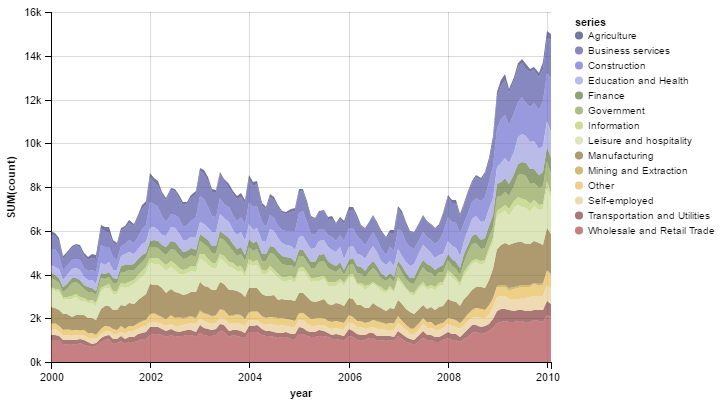

In [14]:
from altair import *

data = load_dataset('unemployment-across-industries')
data['date'] = data['date'].astype(str)
Chart(data).mark_area().encode(
    X('date:T',
      timeUnit='yearmonth',
      axis=Axis(format='%Y', labelAngle=0, title='year')),
    Y('sum(count)'),
    Color('series:N', scale=Scale(range="category20b"))
)